# 과제 1 - SVM 회귀


In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import fetch_openml
import warnings

# 경고 메시지 무시
warnings.filterwarnings('ignore')


In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Boston 데이터셋
url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
boston_df = pd.read_csv(url)

X = boston_df.drop(columns=["medv"])
y = boston_df["medv"]

# 훈련 및 테스트 세트 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
# **** sklearn 버전 이슈로 불러와지지 않아서 url 사용했습니다 ****

# # 데이터 로드
# boston = fetch_openml(name='boston', version=1, as_frame=False)
# X, y = boston.data, boston.target

# # 훈련 및 테스트 세트 분리
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
# 모델 생성
svr = LinearSVR(epsilon = 10)

# 모델 훈련
svr.fit(X_train, y_train)


LinearSVR(epsilon=10)

In [43]:
# 예측
y_pred = svr.predict(X_test)

# 성능 평가
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 61.86956063924839
R-squared: 0.15632934818065203


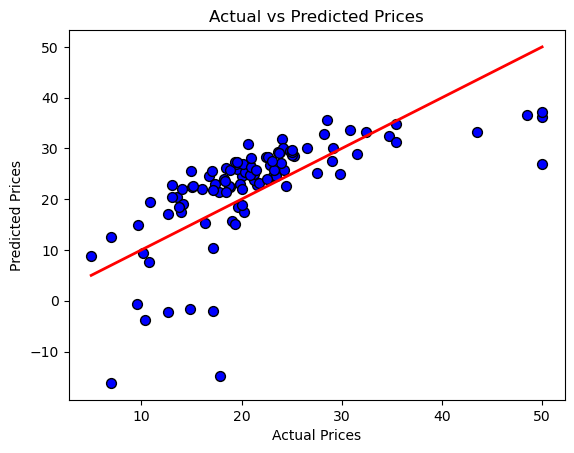

In [44]:
# 일부 feature를 사용하여 2D로 시각화
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', s=50)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()


## 과제 1-1 : epsilon 값을 변경하면서 LinearSVR을 적합한 후, 결과를 확인하고 이유를 분석해주세요!

성능 평가 후 평가지표와 그래프를 사용해서 분석해주세요

In [65]:
# 모델 생성
# epsilon : 0.1, 0.5, 1.0, 5.0, 10.0
svr = LinearSVR(epsilon = 0.01) # Todo


# 모델 훈련
svr.fit(X_train, y_train)


LinearSVR(epsilon=0.01)

In [66]:
# 예측
y_pred = svr.predict(X_test)

# 성능 평가
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 36.933149581993675
R-squared: 0.49636923133707556


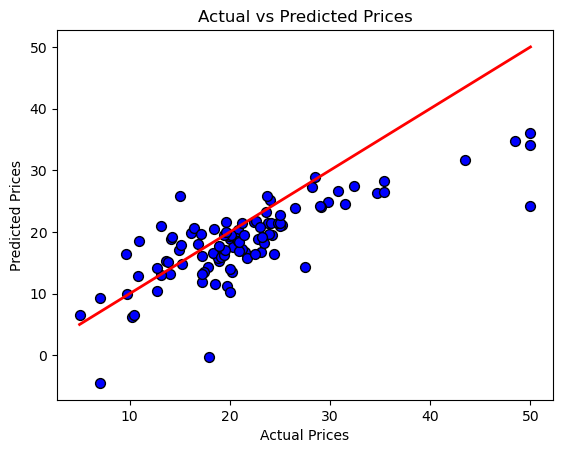

In [67]:
# 일부 feature를 사용하여 2D로 시각화
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', s=50)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()


In [68]:
# epsilon = 10 // R-squared : 0.05
# epsilon = 1.0 // R-squared :0.37
# epsilon = 0.5 // R-squared : 0.56
# epsilon = 0.1 // R-squared : 0.56
# epsilon = 0.01 //R-squared: 0.49

- epsilon 값이 크면, 모델은 더 큰 오차를 허용하게 되어 세부적인 패턴을 고려하지 못하게 됨
    - 따라서 예측 성능이 떨어짐
- epsilon 값이 작을 수록, 작은 오차만 허용하게 되어 모델은 민감해져서 설명력이 높아짐
    - 하지만 과적합 가능성이 존재
- epsilon 값이 너무 크거나 작으면 모델의 성능이 저하됨
    - epsilon = 10의 경우와 epsilon = 0.01의 경우 성능을 통해 알 수 있음
- 따라서 적절한 epsilon 값을 선택하는 것이 중요함

In [97]:
# Todo

# 과제 1-2 : SVM 분류

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.datasets import load_iris
import warnings

# 경고 메시지 무시
warnings.filterwarnings('ignore')


In [7]:
# 데이터 로드
iris = load_iris()
X, y = iris.data, iris.target

# 훈련 및 테스트 세트 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## 과제 1 - 2 trade-off 파라미터 C 값 설정

아래 수식처럼 C가 동작하는데, C가 작을수록 에러가 생겨도 가중치가 작기에 오버피팅을 막을 수 있음.

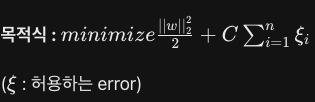


In [19]:
# 다양한 trade-off 파라미터 C 값 설정
C_values = [0.001, 0.01, 0.1, 1, 10, 100] # Todo
train_accuracies = []
test_accuracies = []

for C in C_values:
    # 모델 생성
    svc = LinearSVC(C=C)

    # 모델 훈련
    svc.fit(X_train, y_train)

    # 훈련 데이터와 테스트 데이터에 대한 예측
    y_train_pred = svc.predict(X_train)
    y_test_pred = svc.predict(X_test)

    # 정확도 계산
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)

    # 결과 저장
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

    # 성능 출력
    print(f"C={C}:")
    print(f"Training Accuracy: {train_acc}")
    print(f"Testing Accuracy: {test_acc}")
    print(f"Classification Report:\n{classification_report(y_test, y_test_pred)}")
    print("-" * 50)


C=0.001:
Training Accuracy: 0.6583333333333333
Testing Accuracy: 0.7
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.00      0.00      0.00         9
           2       0.55      1.00      0.71        11

    accuracy                           0.70        30
   macro avg       0.52      0.67      0.57        30
weighted avg       0.54      0.70      0.59        30

--------------------------------------------------
C=0.01:
Training Accuracy: 0.8
Testing Accuracy: 0.8333333333333334
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.44      0.62         9
           2       0.69      1.00      0.81        11

    accuracy                           0.83        30
   macro avg       0.90      0.81      0.81        30
weighted avg       0.89      0.83      0.82        30

----

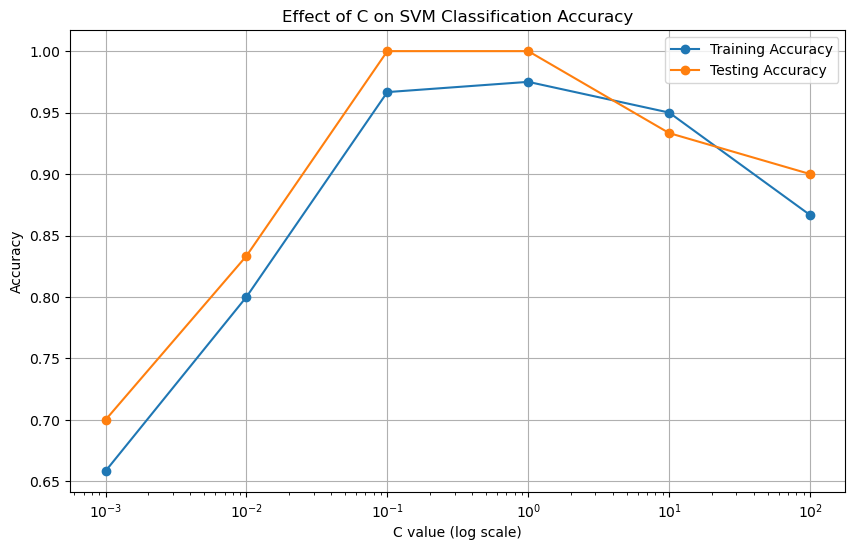

In [20]:
# C 값에 따른 정확도 시각화
plt.figure(figsize=(10, 6))
plt.plot(C_values, train_accuracies, marker='o', label='Training Accuracy')
plt.plot(C_values, test_accuracies, marker='o', label='Testing Accuracy')
plt.xscale('log')
plt.xlabel('C value (log scale)')
plt.ylabel('Accuracy')
plt.title('Effect of C on SVM Classification Accuracy')
plt.legend()
plt.grid(True)
plt.show()

- C 값이 작을 수록, 과소적합으로 성능이 낮아짐
- C 값이 클 수록, 과적합 가능성이 증가
- 따라서 SVM 또한 적절한 C 값을 선택하는 것이 중요